In [1]:
import madmom
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import scipy
import time

### Librosa

In [2]:
#Chroma feature Librosa stft
def Chroma_freature_librosa_stft(uploaded_file_name):
    y, sr =librosa.load(uploaded_file_name)

    chroma_librosa_stft = librosa.feature.chroma_stft(y=y, sr=sr)

    return chroma_librosa_stft


In [3]:
#Chroma feature Librosa cqt
def Chroma_freature_librosa_cqt(uploaded_file_name):
    y, sr =librosa.load(uploaded_file_name)

    chroma_librosa_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)

    return chroma_librosa_cqt


In [4]:
#Chroma feature Librosa cens
def Chroma_freature_librosa_cens(uploaded_file_name):
    y, sr =librosa.load(uploaded_file_name)

    chroma_librosa_cens = librosa.feature.chroma_cens(y=y, sr=sr)

    return chroma_librosa_cens


In [5]:
#Enhanced chroma
def Chroma_feature_librosa_enhanced(uploaded_file_name):
    y, sr = librosa.load(uploaded_file_name)

    y_harm = librosa.effects.harmonic(y=y, margin=8)

    chroma_harm = librosa.feature.chroma_cqt(y=y_harm, sr=sr)
    chroma_filter = np.minimum(chroma_harm, librosa.decompose.nn_filter(chroma_harm, aggregate=np.median, metric= 'cosine'))
    crhoma_smooth = scipy.ndimage.median_filter(chroma_filter, size=(1,9))
    
    return crhoma_smooth

In [6]:
# t_sampl = 1/sr
# time_of_hop = t_sampl * 512

# time = time_of_hop * np.arange(0,chroma_librosa_stft.shape[1],1)
# time


### Madmom

In [7]:
#Chroma feature Madmom
def Chroma_feature_madmom(uploaded_file_name):
    dcp = madmom.audio.DeepChromaProcessor()
    chroma_madmom_deep = dcp(uploaded_file_name)
    chroma_madmom_deep = np.transpose(chroma_madmom_deep)
    return chroma_madmom_deep

### Aubio

Aubio neposkytuje přímý výpočet chromavektorů

### Zobrazení grafů

In [11]:
def Print_graphs(chroma_librosa_stft, chroma_librosa_cqt, chroma_librosa_cens, chroma_librosa_enhanced, chroma_madmom_deep,uploaded_file_name):
    xmin_time = 0; # Čas skladby, oa kterého se vykreslí grafy.
    xmax_time = 60; # Čas skladby, do kterého se vykreslí grafy.
    fig, ax = plt.subplots(6,1, figsize=(10,9))
    fig.tight_layout()
    fig.subplots_adjust(hspace = 0.9 )

    hop_length = 512

    y, sr = librosa.load(uploaded_file_name)
    M = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length)
    librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                            y_axis='mel', x_axis='time', hop_length=hop_length,
                            ax=ax[0])
    
    ax[0].set_title('a) Melspektrogram')
    ax[0].set_xlim(xmin=xmin_time, xmax=xmax_time)
    ax[0].set_xlabel("čas [s]")
    ax[0].set_ylabel("frekvence [Hz]")


    img = librosa.display.specshow(chroma_librosa_stft, y_axis='chroma', x_axis='time', ax=ax[1])
    ax[1].set_xlim(xmin=xmin_time, xmax=xmax_time)
    ax[1].set_title("b) Librosa chroma_stft")
    ax[1].set_xlabel("čas [s]")
    ax[1].set_ylabel("výška tónu")



    librosa.display.specshow(chroma_librosa_cqt, y_axis='chroma', x_axis='time', ax=ax[2])
    ax[2].set_xlim(xmin=xmin_time, xmax=xmax_time)
    ax[2].set_title("c) Librosa chroma_cqt")
    ax[2].set_xlabel("čas [s]")
    ax[2].set_ylabel("výška tónu")


    librosa.display.specshow(chroma_librosa_cens, y_axis='chroma', x_axis='time', ax=ax[3])
    ax[3].set_xlim(xmin=xmin_time, xmax=xmax_time)
    ax[3].set_title("d) Librosa chroma_cens")
    ax[3].set_xlabel("čas [s]")
    ax[3].set_ylabel("výška tónu")


    librosa.display.specshow(chroma_librosa_enhanced, y_axis='chroma', x_axis='time', ax=ax[4])
    ax[4].set_xlim(xmin=xmin_time, xmax=xmax_time)
    ax[4].set_title("e) Librosa chroma_enhaced")
    ax[4].set_xlabel("čas [s]")
    ax[4].set_ylabel("výška tónu")


    librosa.display.specshow(chroma_madmom_deep, sr=sr, hop_length=2204, y_axis='chroma', x_axis='time', ax=ax[5])
    ax[5].set_xlim(xmin=xmin_time, xmax=xmax_time)
    ax[5].set_title("f) Madmom chroma_Deep")
    ax[5].set_xlabel("čas [s]")
    ax[5].set_ylabel("výška tónu")

    fig.colorbar(img, ax=ax,fraction=0.03, pad=0.01)

    # fig.savefig('Oh-Darling_chroma_analysis_graphs.eps', format='eps', bbox_inches='tight')
    
    return

In [12]:
def Chromavectors_analyse(uploaded_file_name):
    start_time =time.time()
    chroma_librosa_stft = Chroma_freature_librosa_stft(uploaded_file_name)
    time_librosa_stft = time.time() - start_time 

    start_time = time.time()
    chroma_librosa_cqt = Chroma_freature_librosa_cqt(uploaded_file_name)
    time_librosa_cqt = time.time() - start_time

    start_time = time.time()
    chroma_librosa_cens = Chroma_freature_librosa_cens(uploaded_file_name)
    time_librosa_cens = time.time() - start_time

    start_time = time.time()
    chroma_librosa_enhaced = Chroma_feature_librosa_enhanced(uploaded_file_name)
    time_librosa_enhanced = time.time() - start_time

    start_time = time.time()
    chroma_madmom_deep = Chroma_feature_madmom(uploaded_file_name)
    time_madmom_deep = time.time() - start_time

    print("Čas trvání výpočtu Librosa stft:",f"{time_librosa_stft: .4f}","s")
    print("Čas trvání výpočtu Librosa cqt:",f"{time_librosa_cqt: .4f}","s")
    print("Čas trvání výpočtu Librosa cens:",f"{time_librosa_cens: .4f}","s")
    print("Čas trvání výpočtu Librosa enhanced:",f"{time_librosa_enhanced: .4f}","s")
    print("Čas trvání výpočtu Madmom deep:",f"{time_madmom_deep: .4f}","s")

    Print_graphs(chroma_librosa_stft, chroma_librosa_cqt, chroma_librosa_cens, chroma_librosa_enhaced, chroma_madmom_deep,uploaded_file_name)
    times = [time_librosa_stft, time_librosa_cqt, time_librosa_cens, time_librosa_enhanced, time_madmom_deep]
    return times

Čas trvání výpočtu Librosa stft:  0.3936 s
Čas trvání výpočtu Librosa cqt:  0.9880 s
Čas trvání výpočtu Librosa cens:  1.0070 s
Čas trvání výpočtu Librosa enhanced:  11.9882 s
Čas trvání výpočtu Madmom deep:  0.2730 s


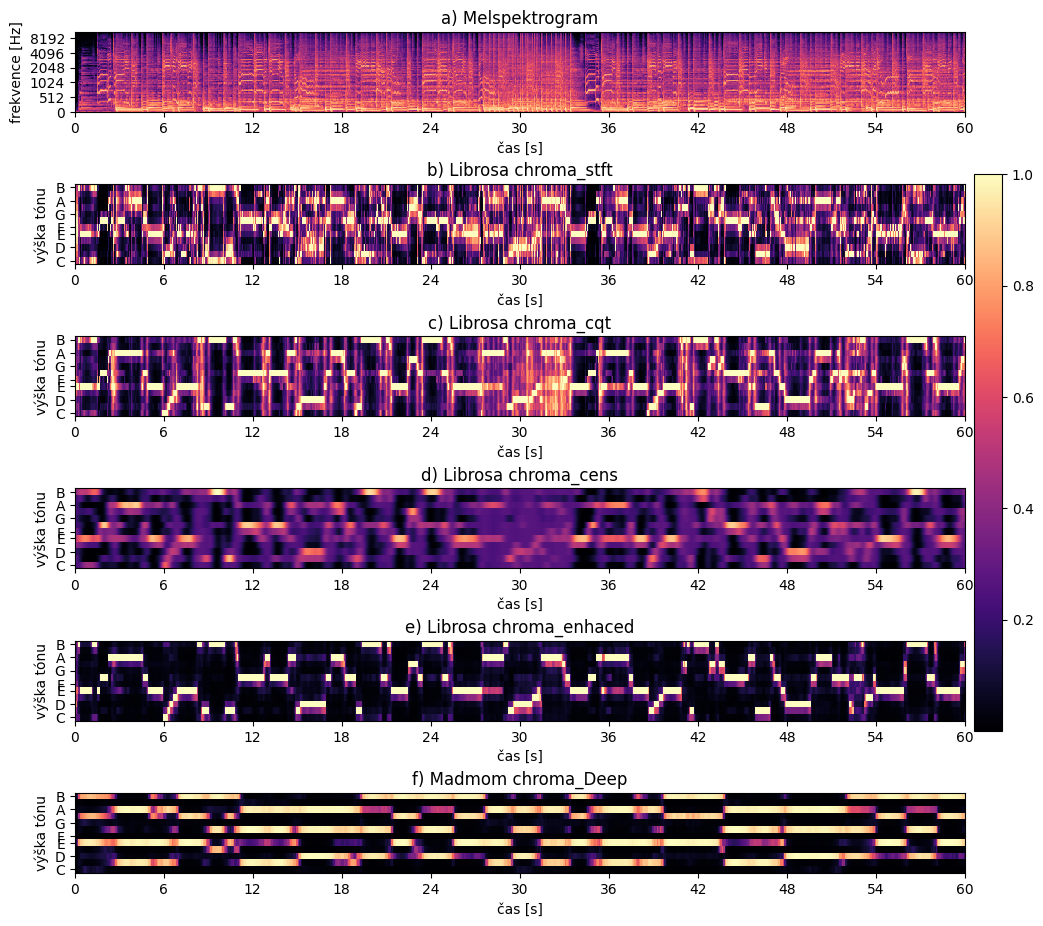

In [13]:
uploaded_file_name = "Referencni_skladby/The Beatles - Abbey Road (1969) (2012 180g Vinyl 24bit-96kHz) [FLAC] vtwin88cube/04.-Oh! Darling.wav"
times_oh_darling = Chromavectors_analyse(uploaded_file_name)

Čas trvání výpočtu Librosa stft:  0.4967 s
Čas trvání výpočtu Librosa cqt:  1.1911 s
Čas trvání výpočtu Librosa cens:  1.2228 s
Čas trvání výpočtu Librosa enhanced:  16.1953 s
Čas trvání výpočtu Madmom deep:  0.2371 s


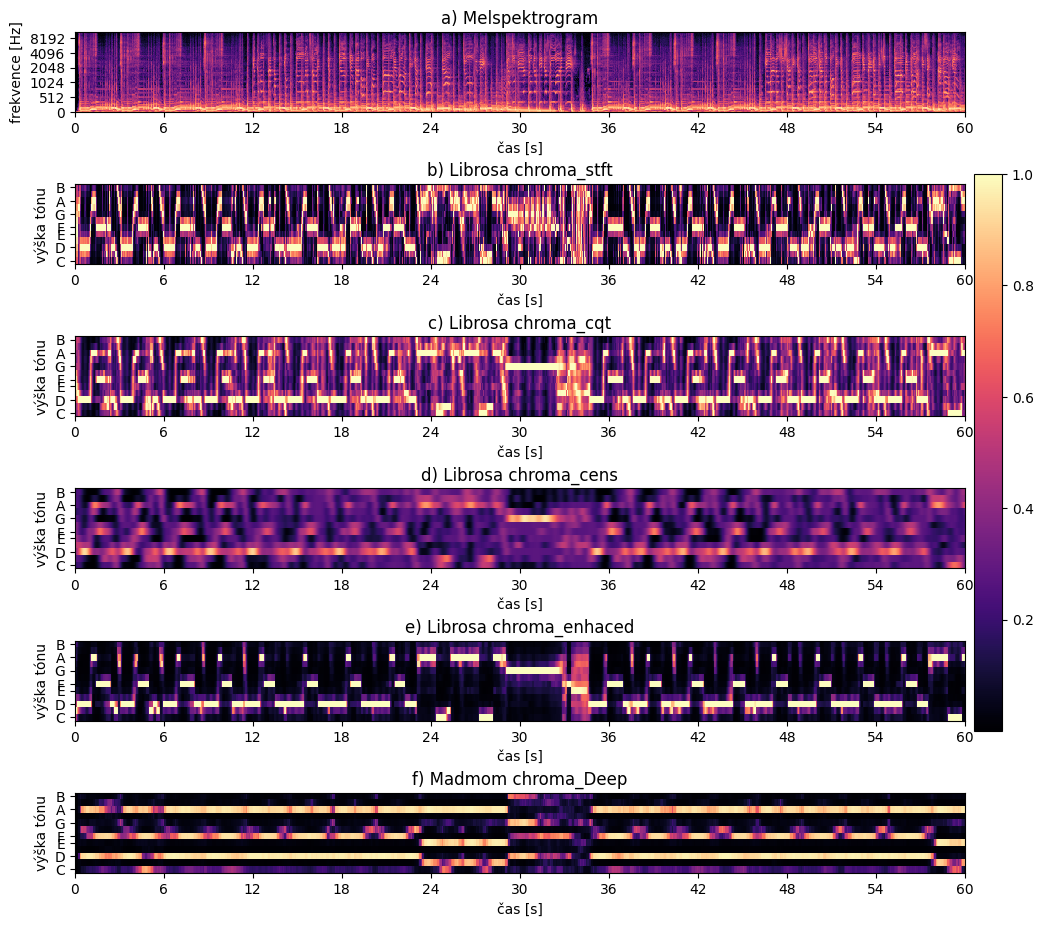

In [14]:
uploaded_file_name = "Referencni_skladby/The Beatles - Abbey Road (1969) (2012 180g Vinyl 24bit-96kHz) [FLAC] vtwin88cube/01.-Come Together.wav"
times_come_together = Chromavectors_analyse(uploaded_file_name)

Čas trvání výpočtu Librosa stft:  0.3372 s
Čas trvání výpočtu Librosa cqt:  0.9203 s
Čas trvání výpočtu Librosa cens:  0.9020 s
Čas trvání výpočtu Librosa enhanced:  11.2808 s
Čas trvání výpočtu Madmom deep:  0.2880 s


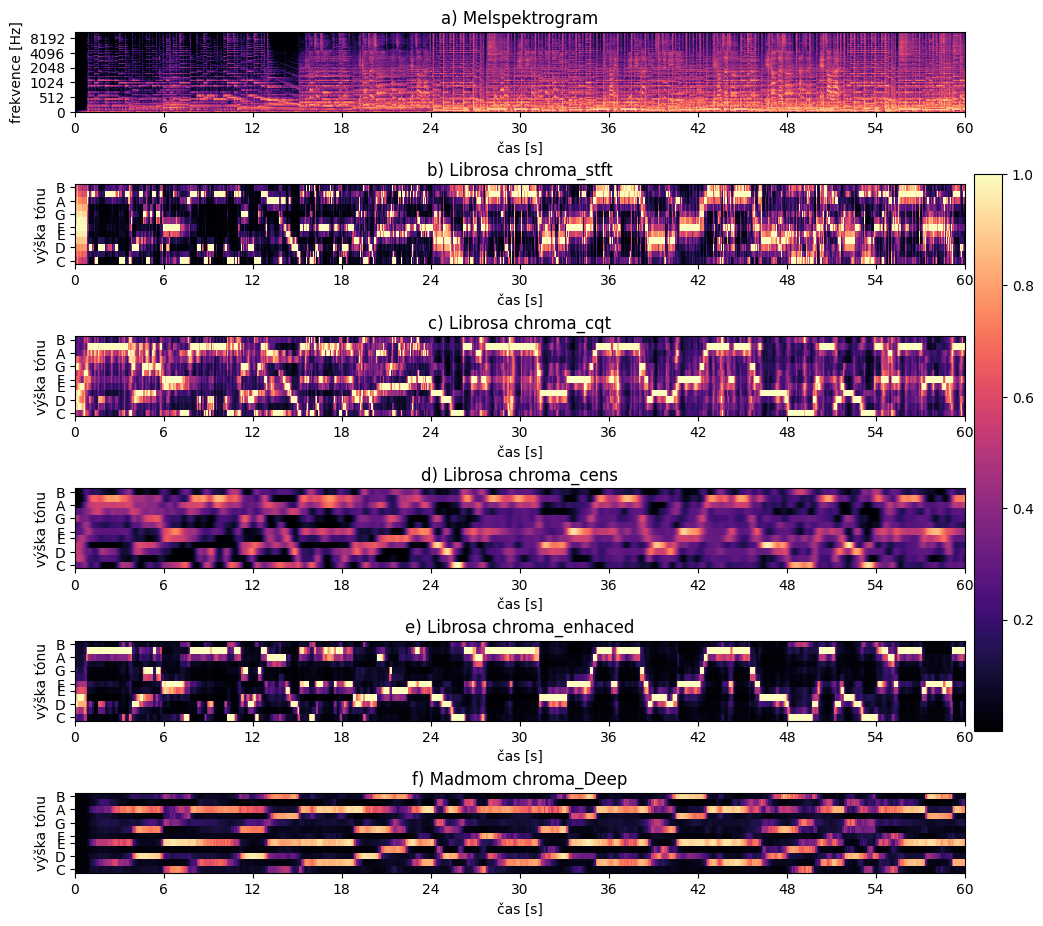

In [15]:
uploaded_file_name = "Referencni_skladby/The Beatles - Abbey Road (1969) (2012 180g Vinyl 24bit-96kHz) [FLAC] vtwin88cube/07.-Here Comes The Sun.wav"
times_here_comes = Chromavectors_analyse(uploaded_file_name)

Čas trvání výpočtu Librosa stft:  0.2745 s
Čas trvání výpočtu Librosa cqt:  0.7112 s
Čas trvání výpočtu Librosa cens:  0.7313 s
Čas trvání výpočtu Librosa enhanced:  8.8659 s
Čas trvání výpočtu Madmom deep:  0.1423 s


[0.274486780166626,
 0.7112348079681396,
 0.7313086986541748,
 8.865908861160278,
 0.14226984977722168]

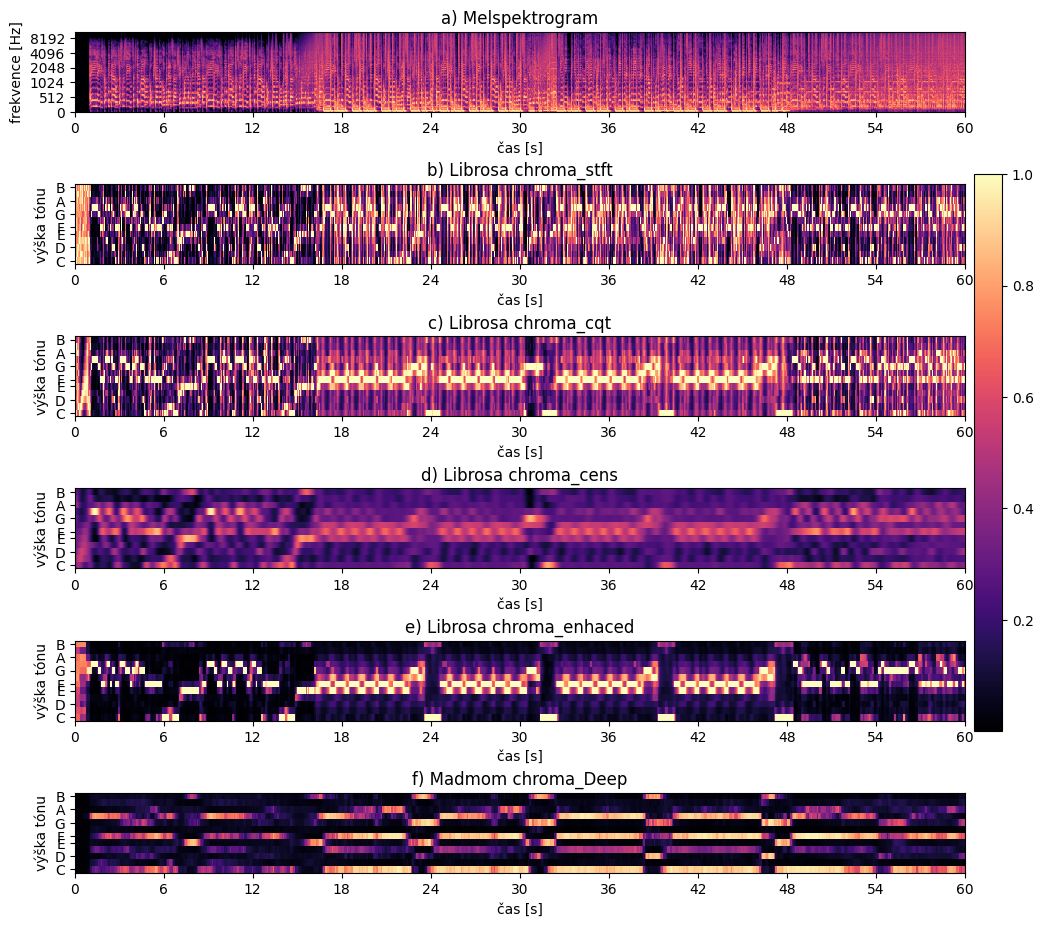

In [16]:
uploaded_file_name = "Referencni_skladby/Imanbek & BYOR - Belly Dancer (Official Music Video).wav"
Chromavectors_analyse(uploaded_file_name)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


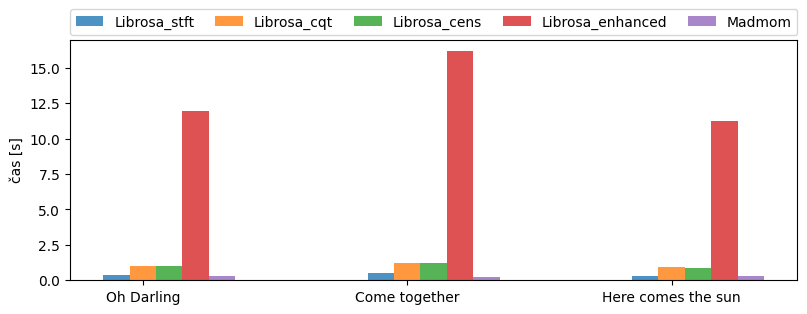

In [17]:
# set width of bar 
barWidth = 0.1
fig, ax = plt.subplots(figsize =(8, 3)) 
fig.tight_layout()
fig.subplots_adjust(hspace = 0.3 )
 
# set height of bar 
times_librosa_stft = [times_oh_darling[0],times_come_together[0],times_here_comes[0]] 
times_librosa_cqt = [times_oh_darling[1],times_come_together[1],times_here_comes[1]] 
times_librosa_cens = [times_oh_darling[2],times_come_together[2],times_here_comes[2]] 
times_librosa_enhanced = [times_oh_darling[3],times_come_together[3],times_here_comes[3]] 
times_madmom = [times_oh_darling[4],times_come_together[4],times_here_comes[4]] 
 
# Set position of bar on X axis 
br1 = np.arange(len(times_librosa_stft)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4] 
 
# Make the plot
ax.bar(br1, times_librosa_stft, width = barWidth, label ='Librosa_stft',alpha = 0.8)
ax.bar(br2, times_librosa_cqt, width = barWidth, label ='Librosa_cqt',alpha = 0.8) 
ax.bar(br3, times_librosa_cens, width = barWidth, label ='Librosa_cens',alpha = 0.8) 
ax.bar(br4, times_librosa_enhanced, width = barWidth, label ='Librosa_enhanced',alpha = 0.8) 
ax.bar(br5, times_madmom, width = barWidth, label ='Madmom',alpha = 0.8) 
 
# Adding Xticks 
ax.set_ylabel("čas [s]")
ax.set_xticks([r + barWidth for r in range(len(times_librosa_stft))], 
        ['Oh Darling','Come together', 'Here comes the sun'])
ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=5)

fig.savefig('Chroma_analysis_times_comparison.eps', format='eps', bbox_inches='tight')
